In [1]:
!pip install VESIcal
import sys
sys.path.append(r'..')
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
#plt.rcParams["mathtext.default"] = "regular"
#plt.rcParams["mathtext.fontset"] = "arial"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 12 # Overall title
plt.rcParams["axes.labelsize"] = 12 # Axes labels
plt.rcParams["legend.fontsize"]= 14

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
Fuego =v.Sample({'SiO2': 49.67,
 'TiO2':     1.17,
 'Al2O3':    16.50,
 'Fe2O3':     1.653168,
 'FeO':       8.432,
 'MnO': 0.185898241,
 'MgO':      4.380435345,
 'CaO':      7.901059264,
 'Na2O':      3.372092032,
 'K2O':       0.79127506,
'P2O5':     0.22})

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 200 ppm calculations

In [4]:
H2O=np.array([0, 0.05, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.15, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 4.8, 5.3, 5.6, 6])
Psat_Fuego_MagmaSat_200=np.empty(len(H2O), dtype=float)
Psat_Fuego_Dixon_200=np.empty(len(H2O), dtype=float)
Psat_Fuego_Shish_200=np.empty(len(H2O), dtype=float)
Psat_Fuego_IM_H_200=np.empty(len(H2O), dtype=float)
Psat_Fuego_IM_A_200=np.empty(len(H2O), dtype=float)
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    for i in range(0, len(H2O)):



        Fuego =v.Sample({'SiO2': 49.67,
     'TiO2':     1.17,
     'Al2O3':    16.50,
     'Fe2O3':     1.653168,
     'FeO':       8.432,
     'MnO': 0.185898241,
     'MgO':      4.380435345,
     'CaO':      7.901059264,
     'Na2O':      3.372092032,
     'K2O':       0.79127506,
    'P2O5':     0.22,
    'CO2': 0.02,
    'H2O': H2O[i]}, default_normalization='none')
        Psat_Fuego_MagmaSat_200[i]=v.calculate_saturation_pressure(sample=Fuego,  temperature=1000).result
        Psat_Fuego_IM_H_200[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano',  temperature=1000).result
        Psat_Fuego_IM_A_200[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano', coeffs="anhydrous",  temperature=1000).result
        Psat_Fuego_Dixon_200[i]=v.calculate_saturation_pressure(sample=Fuego, model='Dixon',  temperature=1000).result
        Psat_Fuego_Shish_200[i]=v.calculate_saturation_pressure(sample=Fuego, model='ShishkinaIdealMixing',  temperature=1000).result

# 1000 ppm CO2

In [5]:
Psat_Fuego_MagmaSat_1000=np.empty(len(H2O), dtype=float)
Psat_Fuego_Dixon_1000=np.empty(len(H2O), dtype=float)
Psat_Fuego_Shish_1000=np.empty(len(H2O), dtype=float)
Psat_Fuego_IM_H_1000=np.empty(len(H2O), dtype=float)
Psat_Fuego_IM_A_1000=np.empty(len(H2O), dtype=float)

with w.catch_warnings():
    w.simplefilter('ignore')
    for i in range(0, len(H2O)):



        Fuego =v.Sample({'SiO2': 49.67,
     'TiO2':     1.17,
     'Al2O3':    16.50,
     'Fe2O3':     1.653168,
     'FeO':       8.432,
     'MnO': 0.185898241,
     'MgO':      4.380435345,
     'CaO':      7.901059264,
     'Na2O':      3.372092032,
     'K2O':       0.79127506,
    'P2O5':     0.22,
    'CO2': 0.1,
    'H2O': H2O[i]}, default_normalization='none')
        Psat_Fuego_MagmaSat_1000[i]=v.calculate_saturation_pressure(sample=Fuego,  temperature=1000).result
        Psat_Fuego_IM_H_1000[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano',  temperature=1000).result
        Psat_Fuego_IM_A_1000[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano', coeffs="anhydrous",  temperature=1000).result
        Psat_Fuego_Dixon_1000[i]=v.calculate_saturation_pressure(sample=Fuego, model='Dixon',  temperature=1000).result
        Psat_Fuego_Shish_1000[i]=v.calculate_saturation_pressure(sample=Fuego, model='ShishkinaIdealMixing',  temperature=1000).result

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 3000 bars

In [6]:
Psat_Fuego_MagmaSat_3000=np.empty(len(H2O), dtype=float)
Psat_Fuego_Dixon_3000=np.empty(len(H2O), dtype=float)
Psat_Fuego_Shish_3000=np.empty(len(H2O), dtype=float)
Psat_Fuego_IM_H_3000=np.empty(len(H2O), dtype=float)
Psat_Fuego_IM_A_3000=np.empty(len(H2O), dtype=float)
with w.catch_warnings():
    w.simplefilter('ignore')
    for i in range(0, len(H2O)):



        Fuego =v.Sample({'SiO2': 49.67,
     'TiO2':     1.17,
     'Al2O3':    16.50,
     'Fe2O3':     1.653168,
     'FeO':       8.432,
     'MnO': 0.185898241,
     'MgO':      4.380435345,
     'CaO':      7.901059264,
     'Na2O':      3.372092032,
     'K2O':       0.79127506,
    'P2O5':     0.22,
    'CO2': 0.3,
    'H2O': H2O[i]}, default_normalization='none')
        Psat_Fuego_MagmaSat_3000[i]=v.calculate_saturation_pressure(sample=Fuego,  temperature=1000).result
        Psat_Fuego_IM_H_3000[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano',  temperature=1000).result
        Psat_Fuego_IM_A_3000[i]=v.calculate_saturation_pressure(sample=Fuego, model='IaconoMarziano', coeffs="anhydrous",  temperature=1000).result
        Psat_Fuego_Dixon_3000[i]=v.calculate_saturation_pressure(sample=Fuego, model='Dixon',  temperature=1000).result
        Psat_Fuego_Shish_3000[i]=v.calculate_saturation_pressure(sample=Fuego, model='ShishkinaIdealMixing',  temperature=1000).result

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Polynomial fitting for MagmaSat, because the precision of +-10 MPa causes quite a lot of bounciness in the graph

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.0, 4000.0)

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


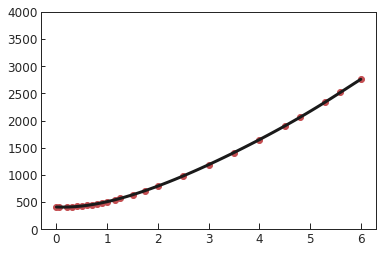

In [7]:
Pf_Magmasat = np.poly1d(np.polyfit(H2O[0:],  Psat_Fuego_MagmaSat_200[0:], 8))
Px_new_Magmasat = np.linspace(min(H2O[0:]), max(H2O[0:]), 50)
Py_new_Magmasat = Pf_Magmasat(Px_new_Magmasat)

plt.plot(H2O,  Psat_Fuego_MagmaSat_200, '.r')
plt.plot(Px_new_Magmasat, Py_new_Magmasat, '-k')
plt.ylim([0, 4000])

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


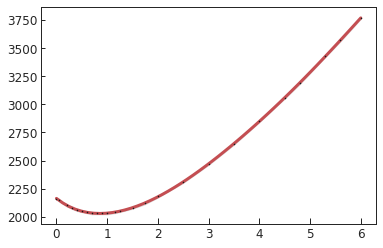

In [8]:
plt.fill_between(H2O, Psat_Fuego_MagmaSat_1000-10, Psat_Fuego_MagmaSat_1000+10, color='grey', alpha=0.2)
Pf_Magmasat_1000 = np.poly1d(np.polyfit(H2O[0:],  Psat_Fuego_MagmaSat_1000[0:], 8))
Px_new_Magmasat_1000 = np.linspace(min(H2O[0:]), max(H2O[0:]), 50)
Py_new_Magmasat_1000 = Pf_Magmasat_1000(Px_new_Magmasat_1000)
plt.plot(Px_new_Magmasat_1000, Py_new_Magmasat_1000, '-r')
plt.plot(H2O, Psat_Fuego_MagmaSat_1000, '*k', markersize=1)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


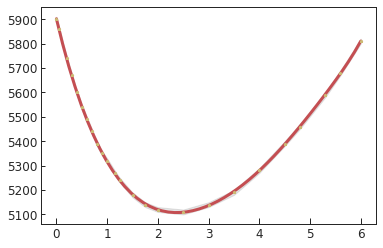

In [9]:
plt.fill_between(H2O, Psat_Fuego_MagmaSat_3000-10, Psat_Fuego_MagmaSat_3000+10, color='grey', alpha=0.2)
Pf_Magmasat_3000 = np.poly1d(np.polyfit(H2O[0:],  Psat_Fuego_MagmaSat_3000[0:], 8))
Px_new_Magmasat_3000 = np.linspace(min(H2O[0:]), max(H2O[0:]), 50)
Py_new_Magmasat_3000 = Pf_Magmasat_3000(Px_new_Magmasat_3000)
plt.plot(Px_new_Magmasat_3000, Py_new_Magmasat_3000, '-r')
plt.plot(H2O, Psat_Fuego_MagmaSat_3000, '*y', markersize=3)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


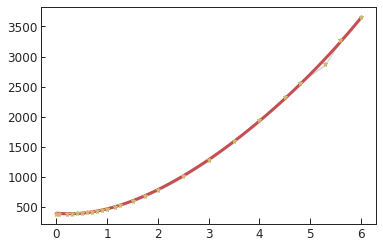

In [10]:
plt.fill_between(H2O, Psat_Fuego_IM_A_200-10, Psat_Fuego_IM_A_200+10, color='grey', alpha=0.2)
Pf_IM_A_200 = np.poly1d(np.polyfit(H2O[0:],  Psat_Fuego_IM_A_200[0:], 4))
Px_new_IM_A_200 = np.linspace(min(H2O[0:]), max(H2O[0:]), 50)
Py_new_IM_A_200 = Pf_IM_A_200(Px_new_IM_A_200)
plt.plot(Px_new_IM_A_200, Py_new_IM_A_200, '-r')
plt.plot(H2O, Psat_Fuego_IM_A_200, '*y', markersize=5)

# Fitting Papale - need to extrapolate to 0 wt% H2O, as linux app returns an error

In [11]:
# Loading in Papale data
Papale=pd.read_excel(r'../Papale_Inputs_for_each_Figure.xlsx', sheet_name='FuegoBasalt_H2O_Sensitivity',  index_col=None)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


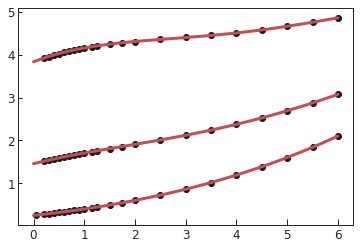

In [12]:
# Papale
y2=0.01*Papale.loc[Papale['Sample']=="Fuego_20", 'Pressure (Mpa)']
x2=Papale.loc[Papale['Sample']=="Fuego_20", 'H2O']
Pf_Papale_200 = np.poly1d(np.polyfit(x2[y2>0], y2[y2>0], 4))
Px_new_Papale_200 = H2O
Py_new_Papale_200 = Pf_Papale_200(Px_new_Papale_200)
plt.plot(x2, y2, '.k')
plt.plot(Px_new_Papale_200, Py_new_Papale_200, '-r')
#plt.xlim([0, 1.5])
y1=0.01*Papale.loc[Papale['Sample']=="Fuego_1000ppm", 'Pressure (Mpa)']
x1=Papale.loc[Papale['Sample']=="Fuego_1000ppm", 'H2O']
Pf_Papale_1000 = np.poly1d(np.polyfit(x1[y1>0], y1[y1>0], 4))
Px_new_Papale_1000 = H2O
Py_new_Papale_1000 = Pf_Papale_1000(Px_new_Papale_1000)
plt.plot(x1, y1, '.k')
plt.plot(Px_new_Papale_1000, Py_new_Papale_1000, '-r')

y3=0.01*Papale.loc[Papale['Sample']=="Fuego_3000ppm", 'Pressure (Mpa)']
x3=Papale.loc[Papale['Sample']=="Fuego_3000ppm", 'H2O']
Pf_Papale_3000 = np.poly1d(np.polyfit(x3[y3>0], y3[y3>0], 4))
Px_new_Papale_3000 = H2O
Py_new_Papale_3000 = Pf_Papale_3000(Px_new_Papale_3000)
plt.plot(x3, y3, '.k')
plt.plot(Px_new_Papale_3000, Py_new_Papale_3000, '-r')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


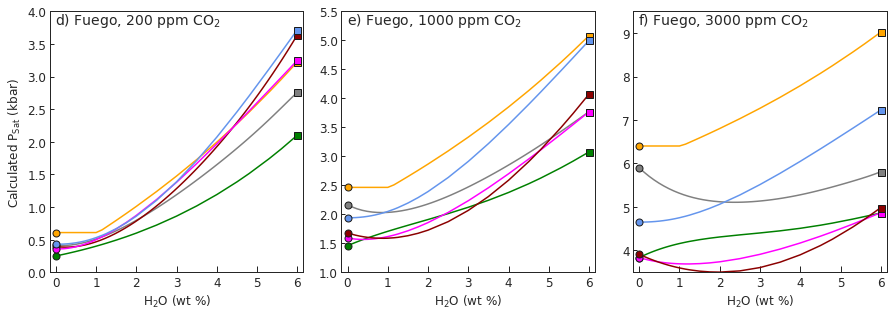

In [13]:
# Figure for all 3 CO2 contents
b=1.5
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4.8), sharex=True) # adjust dimensions of figure here
#------- 200 ppm CO2------------------#
ax1.plot(Px_new_Papale_200, Py_new_Papale_200, '-', color='green', linewidth=b)
ax1.plot(Px_new_Papale_200[0], Py_new_Papale_200[0], 'ok', mfc='green', markersize=7)
ax1.plot(Px_new_Papale_200[-1], Py_new_Papale_200[-1], 'sk', mfc='green', markersize=7)


ax1.plot(Px_new_Magmasat, 0.001*Py_new_Magmasat, '-', color='grey', linewidth=b)
ax1.plot(Px_new_Magmasat[0], 0.001*Py_new_Magmasat[0], 'ok', mfc='grey', markersize=7)
ax1.plot(Px_new_Magmasat[-1], 0.001*Py_new_Magmasat[-1], 'sk', mfc='grey', markersize=7)

ax1.plot(H2O, 0.001*Psat_Fuego_Shish_200, '-', color='orange', linewidth=b)
ax1.plot(H2O[0], 0.001*Psat_Fuego_Shish_200[0], 'ok', mfc='orange', markersize=7)
ax1.plot(H2O[-1], 0.001*Psat_Fuego_Shish_200[-1], 'sk', mfc='orange', markersize=7)


ax1.plot(Px_new_IM_A_200, 0.001*Py_new_IM_A_200, '-', color='darkred', linewidth=b)
ax1.plot(Px_new_IM_A_200[0], 0.001*Py_new_IM_A_200[0], 'ok', mfc='darkred', markersize=7)
ax1.plot(Px_new_IM_A_200[-1], 0.001*Py_new_IM_A_200[-1], 'sk', mfc='darkred', markersize=7)


ax1.plot(H2O, 0.001*Psat_Fuego_IM_H_200, '-', color='magenta', linewidth=b)
ax1.plot(H2O[0], 0.001*Psat_Fuego_IM_H_200[0], 'ok', mfc='magenta', markersize=7)
ax1.plot(H2O[-1], 0.001*Psat_Fuego_IM_H_200[-1], 'sk', mfc='magenta', markersize=7)



ax1.plot(H2O, 0.001*Psat_Fuego_Dixon_200, '-', color='cornflowerblue', linewidth=b)
ax1.plot(H2O[0], 0.001*Psat_Fuego_Dixon_200[0], 'ok', mfc='cornflowerblue', markersize=7)
ax1.plot(H2O[-1], 0.001*Psat_Fuego_Dixon_200[-1], 'sk', mfc='cornflowerblue', markersize=7)

# - ------------- 1000 ppm CO2---------------------------------#
ax2.plot(Px_new_Papale_1000, Py_new_Papale_1000, '-', color='green', linewidth=b)
ax2.plot(Px_new_Papale_1000[0], Py_new_Papale_1000[0], 'ok', mfc='green', markersize=7)
ax2.plot(Px_new_Papale_1000[-1], Py_new_Papale_1000[-1], 'sk', mfc='green', markersize=7)


ax2.plot(Px_new_Magmasat_1000, 0.001*Py_new_Magmasat_1000, '-', color='grey', linewidth=b)
ax2.plot(Px_new_Magmasat_1000[0], 0.001*Py_new_Magmasat_1000[0], 'ok', mfc='grey', markersize=7)
ax2.plot(Px_new_Magmasat_1000[-1], 0.001*Py_new_Magmasat_1000[-1], 'sk', mfc='grey', markersize=7)


ax2.plot(H2O, 0.001*Psat_Fuego_IM_H_1000, '-', color='magenta', linewidth=b)
ax2.plot(H2O[0], 0.001*Psat_Fuego_IM_H_1000[0], 'ok', mfc='magenta', markersize=7)
ax2.plot(H2O[-1], 0.001*Psat_Fuego_IM_H_1000[-1], 'sk', mfc='magenta', markersize=7)

ax2.plot(H2O, 0.001*Psat_Fuego_IM_A_1000, '-', color='darkred', linewidth=b)
ax2.plot(H2O[0], 0.001*Psat_Fuego_IM_A_1000[0], 'ok', mfc='darkred', markersize=7)
ax2.plot(H2O[-1], 0.001*Psat_Fuego_IM_A_1000[-1], 'sk', mfc='darkred', markersize=7)

ax2.plot(H2O, 0.001*Psat_Fuego_Shish_1000, '-', color='orange', linewidth=b)
ax2.plot(H2O[0], 0.001*Psat_Fuego_Shish_1000[0], 'ok', mfc='orange', markersize=7)
ax2.plot(H2O[-1], 0.001*Psat_Fuego_Shish_1000[-1], 'sk', mfc='orange', markersize=7)

ax2.plot(H2O, 0.001*Psat_Fuego_Dixon_1000, '-', color='cornflowerblue', linewidth=b)
ax2.plot(H2O[0], 0.001*Psat_Fuego_Dixon_1000[0], 'ok', mfc='cornflowerblue', markersize=7)
ax2.plot(H2O[-1], 0.001*Psat_Fuego_Dixon_1000[-1], 'sk', mfc='cornflowerblue', markersize=7)

#-------------------------------- 3000 ppm CO2---------------------#
ax3.plot(Px_new_Papale_3000, Py_new_Papale_3000, '-', color='green', linewidth=b)
ax3.plot(Px_new_Papale_3000[0], Py_new_Papale_3000[0], 'ok', mfc='green', markersize=7)
ax3.plot(Px_new_Papale_3000[-1], Py_new_Papale_3000[-1], 'sk', mfc='green', markersize=7)


ax3.plot(Px_new_Magmasat_3000, 0.001*Py_new_Magmasat_3000, '-', color='grey', linewidth=b)
ax3.plot(Px_new_Magmasat_3000[0], 0.001*Py_new_Magmasat_3000[0], 'ok', mfc='grey', markersize=7)
ax3.plot(Px_new_Magmasat_3000[-1], 0.001*Py_new_Magmasat_3000[-1], 'sk', mfc='grey', markersize=7)


ax3.plot(H2O, 0.001*Psat_Fuego_IM_H_3000, '-', color='magenta', linewidth=b)
ax3.plot(H2O[0], 0.001*Psat_Fuego_IM_H_3000[0], 'ok', mfc='magenta', markersize=7)
ax3.plot(H2O[-1], 0.001*Psat_Fuego_IM_H_3000[-1], 'sk', mfc='magenta', markersize=7)

ax3.plot(H2O, 0.001*Psat_Fuego_IM_A_3000, '-', color='darkred', linewidth=b)
ax3.plot(H2O[0], 0.001*Psat_Fuego_IM_A_3000[0], 'ok', mfc='darkred', markersize=7)
ax3.plot(H2O[-1], 0.001*Psat_Fuego_IM_A_3000[-1], 'sk', mfc='darkred', markersize=7)

ax3.plot(H2O, 0.001*Psat_Fuego_Shish_3000, '-', color='orange', linewidth=b)
ax3.plot(H2O[0], 0.001*Psat_Fuego_Shish_3000[0], 'ok', mfc='orange', markersize=7)
ax3.plot(H2O[-1], 0.001*Psat_Fuego_Shish_3000[-1], 'sk', mfc='orange', markersize=7)

ax3.plot(H2O, 0.001*Psat_Fuego_Dixon_3000, '-', color='cornflowerblue', linewidth=b)
ax3.plot(H2O[0], 0.001*Psat_Fuego_Dixon_3000[0], 'ok', mfc='cornflowerblue', markersize=7)
ax3.plot(H2O[-1], 0.001*Psat_Fuego_Dixon_3000[-1], 'sk', mfc='cornflowerblue', markersize=7)
#-------------
ax1.annotate("d) Fuego, 200 ppm CO$_2$", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)

ax2.annotate("e) Fuego, 1000 ppm CO$_2$", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax3.annotate("f) Fuego, 3000 ppm CO$_2$", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
# ax1.set_ylim([0, 13])
ax1.set_xlim([-0.15, 6.15])
ax1.set_ylim([0, 4])
ax2.set_ylim([1, 5.5])
ax3.set_ylim([3.5, 9.5])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.15, hspace=None)
#ax1.set_xticklabels([-0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])

ax1.set_ylabel('Calculated P$_{Sat}$ (kbar)')
#ax2.set_ylabel('P$_{Sat}$ (bar)')
ax1.set_xlabel('H$_2$O (wt %)')
ax2.set_xlabel('H$_2$O (wt %)')
ax3.set_xlabel('H$_2$O (wt %)')


fig.savefig('Fig10_FuegoBasalt_H2OSensitivity.svg', transparent=True)

# Working out values to annotate graph with

## Papale

In [14]:
Papale200Diff=Py_new_Papale_200[-1]/Py_new_Papale_200[0]
Papale1000Diff=Py_new_Papale_1000[-1]/Py_new_Papale_1000[0]
Papale3000Diff=Py_new_Papale_3000[-1]/Py_new_Papale_3000[0]
print([Papale200Diff, Papale1000Diff, Papale3000Diff])

[8.446943624390386, 2.108877472463332, 1.2672173016190782]


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## MagmaSat

In [15]:
MagmaSat200Diff=Py_new_Magmasat[-1]/Py_new_Magmasat[0]
MagmaSat1000Diff=Py_new_Magmasat_1000[-1]/Py_new_Magmasat_1000[0]
MagmaSat3000Diff=Py_new_Magmasat_3000[-1]/Py_new_Magmasat_3000[0]
print([MagmaSat200Diff, MagmaSat1000Diff, MagmaSat3000Diff])

[6.722821468262114, 1.742994382406475, 0.9845063904293544]


## Dixon

In [16]:
Dixon200Diff=Psat_Fuego_Dixon_200[-1]/Psat_Fuego_Dixon_200[0]
Dixon1000Diff=Psat_Fuego_Dixon_1000[-1]/Psat_Fuego_Dixon_1000[0]
Dixon3000Diff=Psat_Fuego_Dixon_3000[-1]/Psat_Fuego_Dixon_3000[0]
print([Dixon200Diff, Dixon1000Diff, Dixon3000Diff])

[8.693571223808297, 2.5783817587770934, 1.5543691926579581]


## IaconMarziano Hydrous

In [17]:
IM_H200Diff=Psat_Fuego_IM_H_200[-1]/Psat_Fuego_IM_H_200[0]
IM_H1000Diff=Psat_Fuego_IM_H_1000[-1]/Psat_Fuego_IM_H_1000[0]
IM_H3000Diff=Psat_Fuego_IM_H_3000[-1]/Psat_Fuego_IM_H_3000[0]
print([IM_H200Diff, IM_H1000Diff, IM_H3000Diff])

[9.075562985941957, 2.3697070349632163, 1.2692448386048483]


## IaconoMarziano Anhydrous

In [18]:
IM_A200Diff=Psat_Fuego_IM_A_200[-1]/Psat_Fuego_IM_A_200[0]
IM_A1000Diff=Psat_Fuego_IM_A_1000[-1]/Psat_Fuego_IM_A_1000[0]
IM_A3000Diff=Psat_Fuego_IM_A_3000[-1]/Psat_Fuego_IM_A_3000[0]
print([IM_A200Diff, IM_A1000Diff, IM_A3000Diff])

[9.423828424416035, 2.4283778368925195, 1.2740875249654278]


## Shishkina

In [19]:
Shish200Diff=Psat_Fuego_Shish_200[-1]/Psat_Fuego_Shish_200[0]
Shish1000Diff=Psat_Fuego_Shish_1000[-1]/Psat_Fuego_Shish_1000[0]
Shish3000Diff=Psat_Fuego_Shish_3000[-1]/Psat_Fuego_Shish_3000[0]
print([Shish200Diff, Shish1000Diff, Shish3000Diff])

[5.307281538248844, 2.0626818321664966, 1.4088040674972069]
